<img src="img/Logo.png" width="100"/>

![logo](img/Recurso-6.png)

### ***Cargo:*** Docente Especialista
### ***Nombre:*** Ing. Elvis Pachacama
### ***Asignatura:*** Machine E-Learning 2
### ***Carrera:*** Desarrollo de Software &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ***Nivel:*** Quinto Nivel
### ***Estudiante:*** Rueda Gaona Félix <br>

## Repositorio: 
#### https://github.com/FelixR93/Maquine-E-Learning-2/blob/main/Regresi%C3%B3n%20Log%C3%ADstica%20Detecci%C3%B3n%20de%20Spam.ipynb
# Tarea <br>


##### Predicción de Riesgo de Diabetes con **Regresión Logística** 
La diabetes es una enfermedad crónica que afecta a millones de personas en el mundo. El diagnóstico temprano es crucial para evitar complicaciones graves. En este ejercicio trabajaremso con un conjunto de datos de pacientes para predecir la probabilidad de que una persona tenga diabetes utilizando **Regresión Logística**
## **Dataset**
El archivo contien 15000 registros con las siguientes variables.<br>
1. Pregnancies: Número de embarazos (0 si es hombre).
2. PlasmaGlucose: Nivel de glucosa plasmática en ayunas (mg/dL).
3. DiastolicBloodPressure: Presión arterial diastólica (mmHg).
4. TricepsThickness: Espesor del pliegue cutáneo del tríceps (mm).
5. SerumInsulin: Concentración de insulina en suero (µU/mL).
6. BMI: Índice de masa corporal (kg/m²).
7. DiabetesPedigree: Factor hereditario de riesgo de diabetes.
8. Age: Edad del paciente (años).
9. Diabetic: Variable objetivo (0 = No diabético, 1 = Diabético).
# Instrucciones
Desarrolle el ejercicio paso a paso en un notebook de Jupyter siguiendo las indicaciones:<br>
1. **Lectura y exploración inicial del dataset**
    * Importe el archivo diabetes.csv.
    * Muestre dimensiones, nombres de columnas y distribución de clases.
    * Verifique valores nulos o inconsistencias.
2. **Análisis exploratorio de datos (EDA)**
    * Genere estadísticas descriptivas de las variables numéricas.
    * Dibuje histogramas para al menos 3 variables.
    * Construya la matriz de correlación entre las variables predictoras.
3. **Preparación del dataset**
    * Elimine columnas irrelevantes (ejemplo: PatientID).
    * Divida el dataset en entrenamiento (80%) y prueba (20%) de manera estratificada.
4. **Construcción del modelo**
    * Defina un Pipeline con:
        * StandardScaler para normalizar los datos.
        * LogisticRegression con max_iter=500.
    * Realice validación cruzada (k=5) en el conjunto de entrenamiento.
    * Reporte el AUC-ROC y el AUC-PR de la validación cruzada.
5. **Evaluación del modelo en el conjunto de prueba**
    * Calcule las probabilidades de pertenecer a la clase diabético.
    * Genere la matriz de confusión y el reporte de clasificación.
    * Calcule las métricas: AUC-ROC, AUC-PR, Brier Score.
    * Dibuje las curvas ROC, Precision-Recall y de calibración.    
6. **Selección de umbral**
    * Construya una tabla de métricas para diferentes umbrales (de 0.1 a 0.9).
    * Determine el mejor umbral según el índice de Youden J.
    * Discuta cómo cambia la sensibilidad y la especificidad al modificar el umbral.    
7. **Interpretación del modelo**
    * Liste los coeficientes de la regresión logística.
    * Calcule los odds ratios e interprete al menos dos variables clave.
    * Ejemplo: “Un aumento de 1 unidad en PlasmaGlucose incrementa en X veces la probabilidad de diabetes”.
8. **Predicción con nuevos pacientes**
   * Ingrese manualmente los datos de 2 pacientes ficticios.
   * Calcule la probabilidad de diabetes y la clasificación final para cada u

In [3]:
# ==== Importar librerías y configurar entorno ====

# Manejo de datos
import pandas as pd        # Para leer, explorar y manipular datos en formato tabla (DataFrame).
import numpy as np         # Para operaciones numéricas, vectores, matrices y cálculos matemáticos.

# Visualización
import matplotlib.pyplot as plt   # Para crear gráficos (histogramas, curvas ROC, etc.).

# División de datos y validación
from sklearn.model_selection import train_test_split, cross_val_score
# train_test_split: divide los datos en conjuntos de entrenamiento y prueba.
# cross_val_score: evalúa el modelo con validación cruzada (por ejemplo, k-fold).

# Construcción del pipeline
from sklearn.pipeline import Pipeline
# Pipeline: permite encadenar pasos (ej. estandarizar + entrenar un modelo) en un solo objeto.

# Preprocesamiento
from sklearn.preprocessing import StandardScaler
# StandardScaler: normaliza los datos (media=0, desviación estándar=1), necesario para regresión logística.

# Modelo
from sklearn.linear_model import LogisticRegression
# LogisticRegression: modelo de clasificación para predecir la probabilidad de pertenecer a una clase.

# Métricas de evaluación
from sklearn.metrics import (
    confusion_matrix,       # Matriz de confusión: compara predicciones con valores reales.
    classification_report,  # Muestra métricas como precisión, recall y f1-score.
    roc_auc_score,          # Área bajo la curva ROC (capacidad de discriminación del modelo).
    average_precision_score,# Área bajo la curva Precision-Recall.
    brier_score_loss,       # Error cuadrático medio de las probabilidades predichas.
    recall_score,           # Sensibilidad: proporción de positivos detectados correctamente.
    precision_score,        # Precisión: proporción de positivos predichos que son correctos.
    RocCurveDisplay,        # Para dibujar la curva ROC.
    PrecisionRecallDisplay  # Para dibujar la curva Precision-Recall.
)

# Calibración del modelo
from sklearn.calibration import CalibrationDisplay
# CalibrationDisplay: muestra si las probabilidades predichas están bien calibradas con la realidad.


## 1. Lectura del dataset

In [20]:
# Intento 1: separador por defecto (',')
df = pd.read_csv("diabetes.csv")  # Se asume que el archivo está en la misma carpeta del notebook

# Si todo vino en una sola columna, re-leer con ';'

if df.shape[1] == 1:
    df = pd.read_csv("diabetes.csv", sep=';')

# Mostrar dimensiones y columnas
print("Dimensiones del dataset:", df.shape)
print("Columnas:", df.columns.tolist())

# Primeras filas del dataset
display(df.head())

Dimensiones del dataset: (15000, 10)
Columnas: ['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age', 'Diabetic']


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


## 2. Limpieza mínima y verificación de clases

In [24]:
TARGET = 'Diabetic' 
# Comprobamos que la columna objetivo exista
if TARGET not in df.columns:
    raise ValueError(f"No se encontró la columna '{TARGET}' en el dataset.")

# Eliminamos ID si existe
if 'PatientID' in df.columns:
    df = df.drop('PatientID', axis=1)
    print("Columna 'PatientID' eliminada.")

# Tipos y valores faltantes
print("\nTipos de datos por columna:")
print(df.dtypes)

print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Distribución de clases
print("\nDistribución de clases:")
print(df[TARGET].value_counts(normalize=True))


Tipos de datos por columna:
Pregnancies                 int64
PlasmaGlucose               int64
DiastolicBloodPressure      int64
TricepsThickness            int64
SerumInsulin                int64
BMI                       float64
DiabetesPedigree          float64
Age                         int64
Diabetic                    int64
dtype: object

Valores faltantes por columna:
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

Distribución de clases:
Diabetic
0    0.666667
1    0.333333
Name: proportion, dtype: float64


## 3. EDA básico

,count,mean,std,min,25%,50%,75%,max
Pregnancies,15000.0,3.224533,3.391020,0.000000,0.000000,2.000000,6.000000,14.000000
PlasmaGlucose,15000.0,107.856867,31.981975,44.000000,84.000000,104.000000,129.000000,192.000000
DiastolicBloodPressure,15000.0,71.220667,16.758716,24.000000,58.000000,72.000000,85.000000,117.000000
TricepsThickness,15000.0,28.814000,14.555716,7.000000,15.000000,31.000000,41.000000,93.000000
SerumInsulin,15000.0,137.852133,133.068252,14.000000,39.000000,83.000000,195.000000,799.000000
BMI,15000.0,31.509646,9.759000,18.200512,21.259887,31.767940,39.259692,56.034628
DiabetesPedigree,15000.0,0.398968,0.377944,0.078044,0.137743,0.200297,0.616285,2.301594
Age,15000.0,30.137733,12.089703,21.000000,22.000000,24.000000,35.000000,77.000000


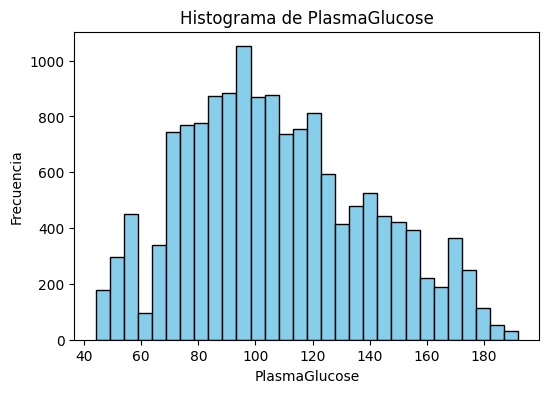

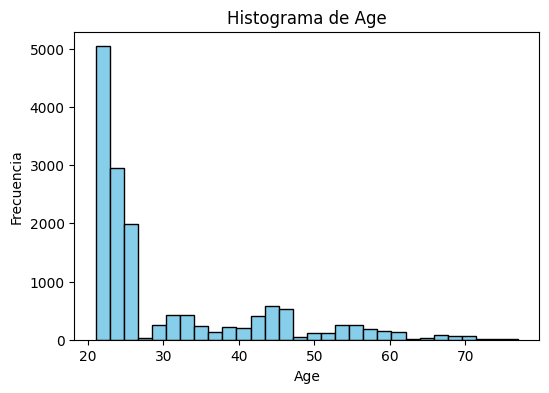

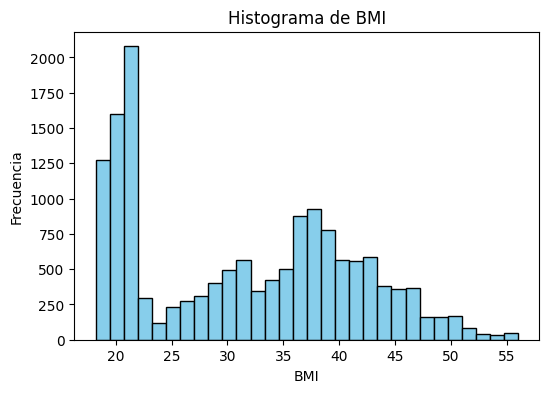

In [25]:
num_cols = [c for c in df.columns if c != TARGET]

# Estadísticas descriptivas
display(df[num_cols].describe().T)

# Histograma simple por variable numérica

for col in ['PlasmaGlucose', 'Age', 'BMI']:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

In [28]:
# Matriz de correlación (sin seaborn)
print("\nMatriz de correlación entre variables numéricas:")
display(df[num_cols].corr())



Matriz de correlación entre variables numéricas:


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
Pregnancies,1.000000,0.054502,0.043528,0.063605,0.104487,0.086386,0.054240,0.136972
PlasmaGlucose,0.054502,1.000000,0.007212,0.027100,0.033545,0.020653,0.009057,0.038864
DiastolicBloodPressure,0.043528,0.007212,1.000000,0.011106,0.022649,0.015873,0.014099,0.041333
TricepsThickness,0.063605,0.027100,0.011106,1.000000,0.029688,0.024745,-0.000951,0.061383
SerumInsulin,0.104487,0.033545,0.022649,0.029688,1.000000,0.051223,0.046324,0.088007
BMI,0.086386,0.020653,0.015873,0.024745,0.051223,1.000000,0.028868,0.062910
DiabetesPedigree,0.054240,0.009057,0.014099,-0.000951,0.046324,0.028868,1.000000,0.055633
Age,0.136972,0.038864,0.041333,0.061383,0.088007,0.062910,0.055633,1.000000


## 4. Partición Train/Test (estratificada)

In [29]:
X = df.drop(TARGET, axis=1)
y = df[TARGET]

# División estratificada 80% entrenamiento / 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Tamaño conjunto entrenamiento:", X_train.shape)
print("Tamaño conjunto prueba:", X_test.shape)

print("\nDistribución clases en entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nDistribución clases en prueba:")
print(y_test.value_counts(normalize=True))

Tamaño conjunto entrenamiento: (12000, 8)
Tamaño conjunto prueba: (3000, 8)

Distribución clases en entrenamiento:
Diabetic
0    0.666667
1    0.333333
Name: proportion, dtype: float64

Distribución clases en prueba:
Diabetic
0    0.666667
1    0.333333
Name: proportion, dtype: float64


## 5. Pipeline (Scaler + Regresión Logística) y Validación Cruzada

In [30]:
# Crear Pipeline: escalado + regresión logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),                # Normaliza variables numéricas
    ('logreg', LogisticRegression(max_iter=500)) # Regresión logística
])

# Validación cruzada k=5
auc_roc_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
auc_pr_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='average_precision')

print("AUC-ROC CV (media):", auc_roc_scores.mean())
print("AUC-PR CV (media):", auc_pr_scores.mean())

AUC-ROC CV (media): 0.85777140625
AUC-PR CV (media): 0.7419534544011258


## 6. Entrenamiento final y evaluación en Test

In [31]:
# Entrenar Pipeline con todo el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:,1]  # Probabilidades para clase 1

# Matriz de confusión y métricas
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))
print("AUC-PR:", average_precision_score(y_test, y_prob))
print("Brier Score:", brier_score_loss(y_test, y_prob))

Matriz de confusión:
 [[1769  231]
 [ 404  596]]

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.81      0.88      0.85      2000
           1       0.72      0.60      0.65      1000

    accuracy                           0.79      3000
   macro avg       0.77      0.74      0.75      3000
weighted avg       0.78      0.79      0.78      3000

AUC-ROC: 0.855441
AUC-PR: 0.7455233641721204
Brier Score: 0.14415839388477106


## 7. Curvas ROC y Precision-Recall

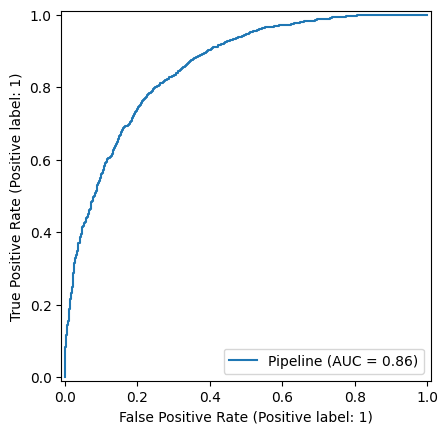

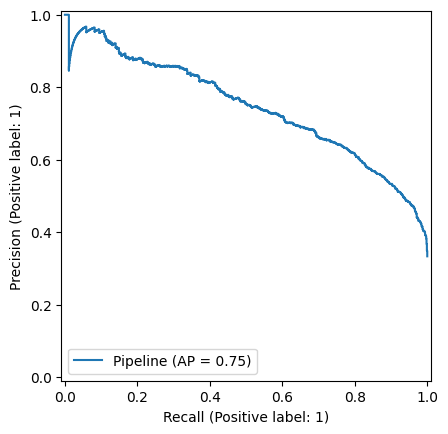

In [32]:
# Curva ROC
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()

# Curva Precision-Recall
PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()


## 8. Calibración y Brier score

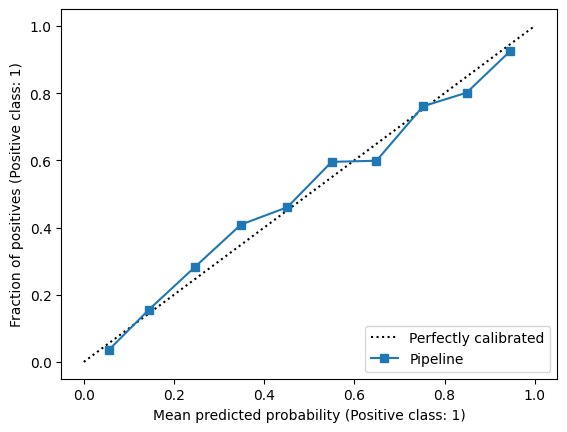

In [33]:
# Curva de calibración
CalibrationDisplay.from_estimator(pipeline, X_test, y_test, n_bins=10)
plt.show()

# Brier Score ya se calculó en el punto 6

## 9. Selección de umbral (Youden J y sensibilidad objetivo)

In [34]:
thresholds = np.arange(0.1, 1.0, 0.1)
table = []

for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    sensitivity = recall_score(y_test, y_pred_thresh)
    specificity = cm[0,0] / cm[0].sum()
    youden_j = sensitivity + specificity - 1
    table.append([t, sensitivity, specificity, youden_j])

# Crear DataFrame con métricas por umbral
table_df = pd.DataFrame(table, columns=["Umbral","Sensibilidad","Especificidad","YoudenJ"])
print(table_df)

# Mejor umbral según Youden J
best_idx = table_df["YoudenJ"].idxmax()
print("\nMejor umbral según Youden J:\n", table_df.loc[best_idx])

   Umbral  Sensibilidad  Especificidad  YoudenJ
0     0.1         0.971         0.3995   0.3705
1     0.2         0.882         0.6405   0.5225
2     0.3         0.789         0.7585   0.5475
3     0.4         0.695         0.8265   0.5215
4     0.5         0.596         0.8845   0.4805
5     0.6         0.465         0.9290   0.3940
6     0.7         0.371         0.9605   0.3315
7     0.8         0.250         0.9795   0.2295
8     0.9         0.125         0.9950   0.1200

Mejor umbral según Youden J:
 Umbral           0.3000
Sensibilidad     0.7890
Especificidad    0.7585
YoudenJ          0.5475
Name: 2, dtype: float64


## 10. Interpretación: coeficientes y **odds ratios**

In [35]:
# Recuperar coeficientes de la regresión logística entrenada
coef = pipeline.named_steps['logreg'].coef_[0]
odds_ratios = np.exp(coef)

coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": coef,
    "OddsRatio": odds_ratios
})
display(coef_df)

,Variable,Coeficiente,OddsRatio
0,Pregnancies,0.921006,2.511815
1,PlasmaGlucose,0.296551,1.345212
2,DiastolicBloodPressure,0.201298,1.222989
3,TricepsThickness,0.340428,1.405549
4,SerumInsulin,0.510625,1.666332
5,BMI,0.499743,1.648298
6,DiabetesPedigree,0.379139,1.461027
7,Age,0.697250,2.008223


## 11. Explicabilidad con SHAP (opcional)

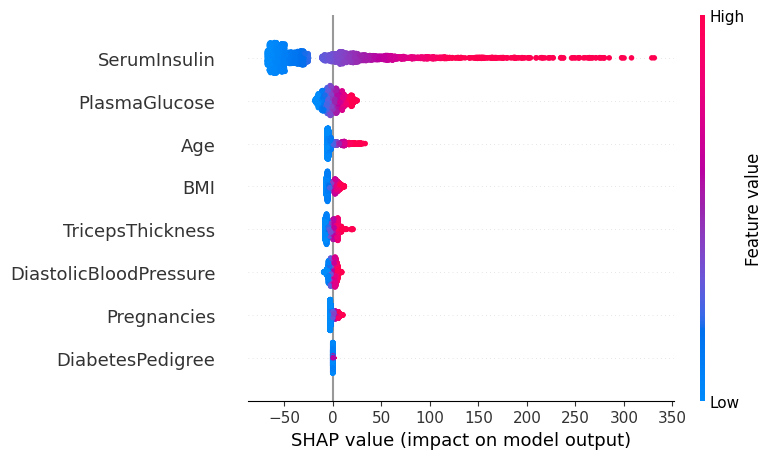

In [42]:

# Opcional: explicar predicciones con SHAP
import shap
explainer = shap.LinearExplainer(pipeline.named_steps['logreg'], X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

## 12. Guardar modelo y métricas

In [43]:
import joblib
# Guardar modelo y resumen de métricas
# Guardar Pipeline entrenado
joblib.dump(pipeline, "modelo_logistico_diabetes.pkl")

# Guardar métricas resumidas
metrics = {
    "AUC-ROC": roc_auc_score(y_test, y_prob),
    "AUC-PR": average_precision_score(y_test, y_prob),
    "BrierScore": brier_score_loss(y_test, y_prob)
}
joblib.dump(metrics, "metricas_diabetes.pkl")

['metricas_diabetes.pkl']

## 13. Verificar el modelo con nuevos datos

In [44]:
# Crear DataFrame con datos ficticios
new_patients = pd.DataFrame([
    {"Pregnancies":2,"PlasmaGlucose":140,"DiastolicBloodPressure":80,"TricepsThickness":25,"SerumInsulin":100,"BMI":30,"DiabetesPedigree":0.5,"Age":40},
    {"Pregnancies":0,"PlasmaGlucose":95,"DiastolicBloodPressure":70,"TricepsThickness":20,"SerumInsulin":85,"BMI":22,"DiabetesPedigree":0.2,"Age":25}
])

# Probabilidades y predicción final
prob_new = pipeline.predict_proba(new_patients)[:,1]
pred_new = pipeline.predict(new_patients)

print("Probabilidades de diabetes:", prob_new)
print("Clasificación final (0=No, 1=Sí):", pred_new)

Probabilidades de diabetes: [0.3616175  0.03239382]
Clasificación final (0=No, 1=Sí): [0 0]
